In [1]:
import torch
import joblib
import pickle
import pandas as pd
import numpy as np
from functions import auroc_curve, evaluation, rm, complete_confusion_matrix_robust, evaluation_robustness, complete_confusion_matrix
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

results = pd.DataFrame(columns=["Model", "AUROC", "Accuracy", "F1", "Recall", "Precision"])
model_results = pd.DataFrame(columns=["Model", "AUROC", "Accuracy", "F1", "Recall", "Precision"])

path_csv = "../../../Thesis_data/processed_data/"
path_model = "../../../Thesis_data/Models/"

In [5]:
X_test = rm(pd.read_csv(path_csv + "ontime_reporting_X_test.csv"))
y_test = np.ravel(pd.read_csv(path_csv + "ontime_reporting_y_test.csv"))

Memory usage of dataframe is 314.23 MB
Memory usage after optimization is: 78.56 MB
Decreased by 75.0%


## Evaluate Logistic Regression tuned ROS model

In [6]:
logreg_tuned_ros = joblib.load(path_model + "logreg_tuned_ROS.joblib")
y_pred_logreg_tuned_ros = logreg_tuned_ros.predict(X_test)
y_pred_prob_logreg_tuned_ros = logreg_tuned_ros.predict_proba(X_test)[:, 1]

AUROC Score:  0.74
Accuracy Score:  0.797
Balanced Accuracy Score:  0.683
F1 Score:  0.481
Recall Score:  0.499
Precision Score:  0.465


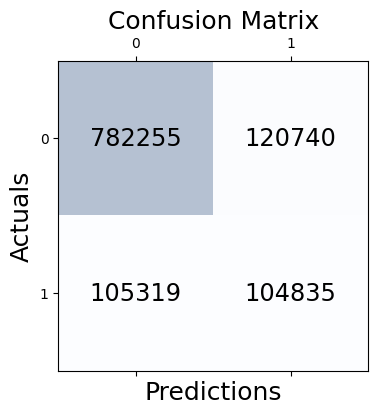

In [7]:
evaluation(y_test, y_pred_logreg_tuned_ros, logreg_tuned_ros, y_pred_prob_logreg_tuned_ros, results)

## Evaluate XGBoost tuned ROS model

In [8]:
xgb_class_tuned_ros = joblib.load(path_model + "XGBoost_tuned_ROS.joblib")
y_pred_xgb_tuned_ros = xgb_class_tuned_ros.predict(X_test)
y_pred_prob_xgb_tuned_ros = xgb_class_tuned_ros.predict_proba(X_test)[:, 1]

AUROC Score:  0.819
Accuracy Score:  0.813
Balanced Accuracy Score:  0.746
F1 Score:  0.563
Recall Score:  0.64
Precision Score:  0.503


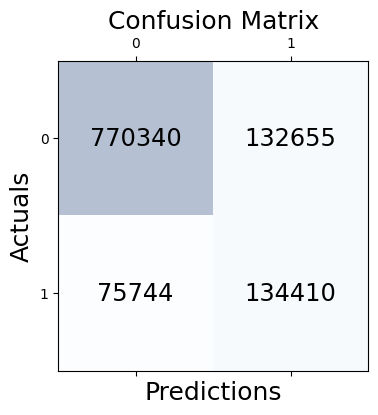

In [9]:
evaluation(y_test, y_pred_xgb_tuned_ros, xgb_class_tuned_ros, y_pred_prob_xgb_tuned_ros, results)

## Evaluate TabNet tuned ROS model

In [13]:
tabnet_tuned_ros = torch.load(path_model + "TabNet_tuned_ROS.pt", map_location=torch.device('cpu'))
tabnet_tuned_ros.device = "cpu"
y_pred_tabnet_tuned_ros = tabnet_tuned_ros.predict(X_test.values)
y_pred_prob_tabnet_tuned_ros = tabnet_tuned_ros.predict_proba(X_test.values)[:, 1]

AUROC Score:  0.768
Accuracy Score:  0.773
Balanced Accuracy Score:  0.704
F1 Score:  0.496
Recall Score:  0.593
Precision Score:  0.426


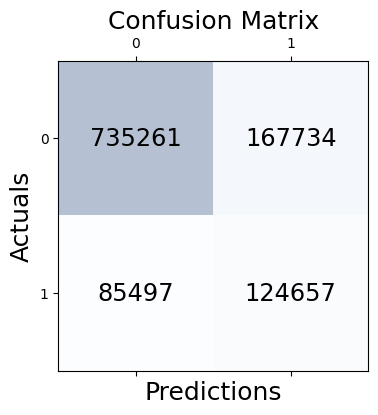

In [14]:
evaluation(y_test, y_pred_tabnet_tuned_ros, tabnet_tuned_ros, y_pred_prob_tabnet_tuned_ros, results)

## Evaluate Random Forests tuned ROS model

In [15]:
rf_tuned_ros = joblib.load(path_model + "rf_tuned_ROS.joblib")
y_pred_rf_tuned_ros = rf_tuned_ros.predict(X_test)
y_pred_prob_rf_tuned_ros = rf_tuned_ros.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   19.6s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:   30.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   19.6s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:   31.1s finished


AUROC Score:  0.798
Accuracy Score:  0.814
Balanced Accuracy Score:  0.726
F1 Score:  0.543
Recall Score:  0.584
Precision Score:  0.507


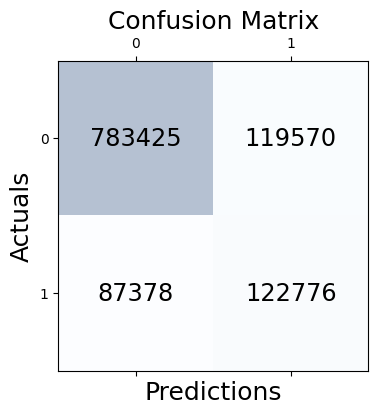

In [16]:
evaluation(y_test, y_pred_rf_tuned_ros, rf_tuned_ros, y_pred_prob_rf_tuned_ros, results)

## Final results per model

In [17]:
results.sort_values(by=["AUROC"], ascending=False)

,Model,AUROC,Accuracy,F1,Recall,Precision
2,XGBClassifier,0.819,0.813,0.563,0.640,0.503
4,RandomForestClassifier,0.798,0.814,0.543,0.584,0.507
3,TabNetClassifier,0.768,0.773,0.496,0.593,0.426
1,LogisticRegression,0.740,0.797,0.481,0.499,0.465


In [ ]:
final_result = model_results.groupby('Model').agg({
    'AUROC': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))],
    'Accuracy': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))],
    'F1': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))],
    'Recall': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))],
    'Precision': [('mean', 'mean'), ('range', lambda x: np.max(x) - np.min(x))]
})

final_result.columns = ['_'.join(col).strip() for col in final_result.columns.values]

final_result.sort_values(by=["AUROC_mean"], ascending=False)

,AUROC_mean,AUROC_range,Accuracy_mean,Accuracy_range,F1_mean,F1_range,Recall_mean,Recall_range,Precision_mean,Precision_range
Model,,,,,,,,,,
XGBClassifier,0.8672,0.061,0.8340,0.027,0.6146,0.065,0.7020,0.078,0.5468,0.055
RandomForestClassifier,0.8396,0.052,0.8300,0.020,0.5840,0.052,0.6316,0.061,0.5430,0.045
TabNetClassifier,0.7690,0.002,0.7734,0.001,0.4970,0.002,0.5936,0.003,0.4272,0.002
LogisticRegression,0.7404,0.001,0.7976,0.001,0.4822,0.002,0.4996,0.003,0.4660,0.002


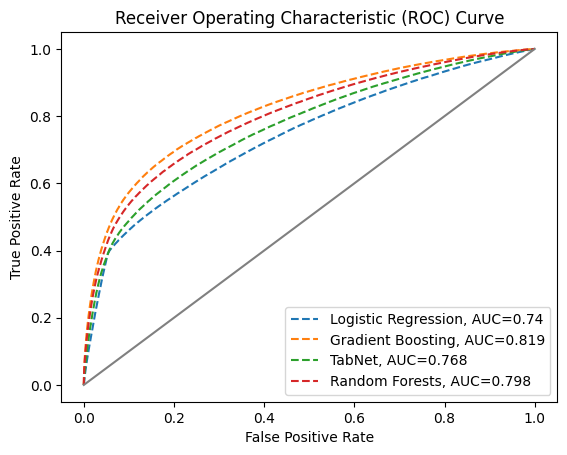

<Figure size 1400x1200 with 0 Axes>

In [18]:
auroc_curve(y_test, y_pred_prob_logreg_tuned_ros, y_pred_prob_xgb_tuned_ros, y_pred_prob_tabnet_tuned_ros, y_pred_prob_rf_tuned_ros)

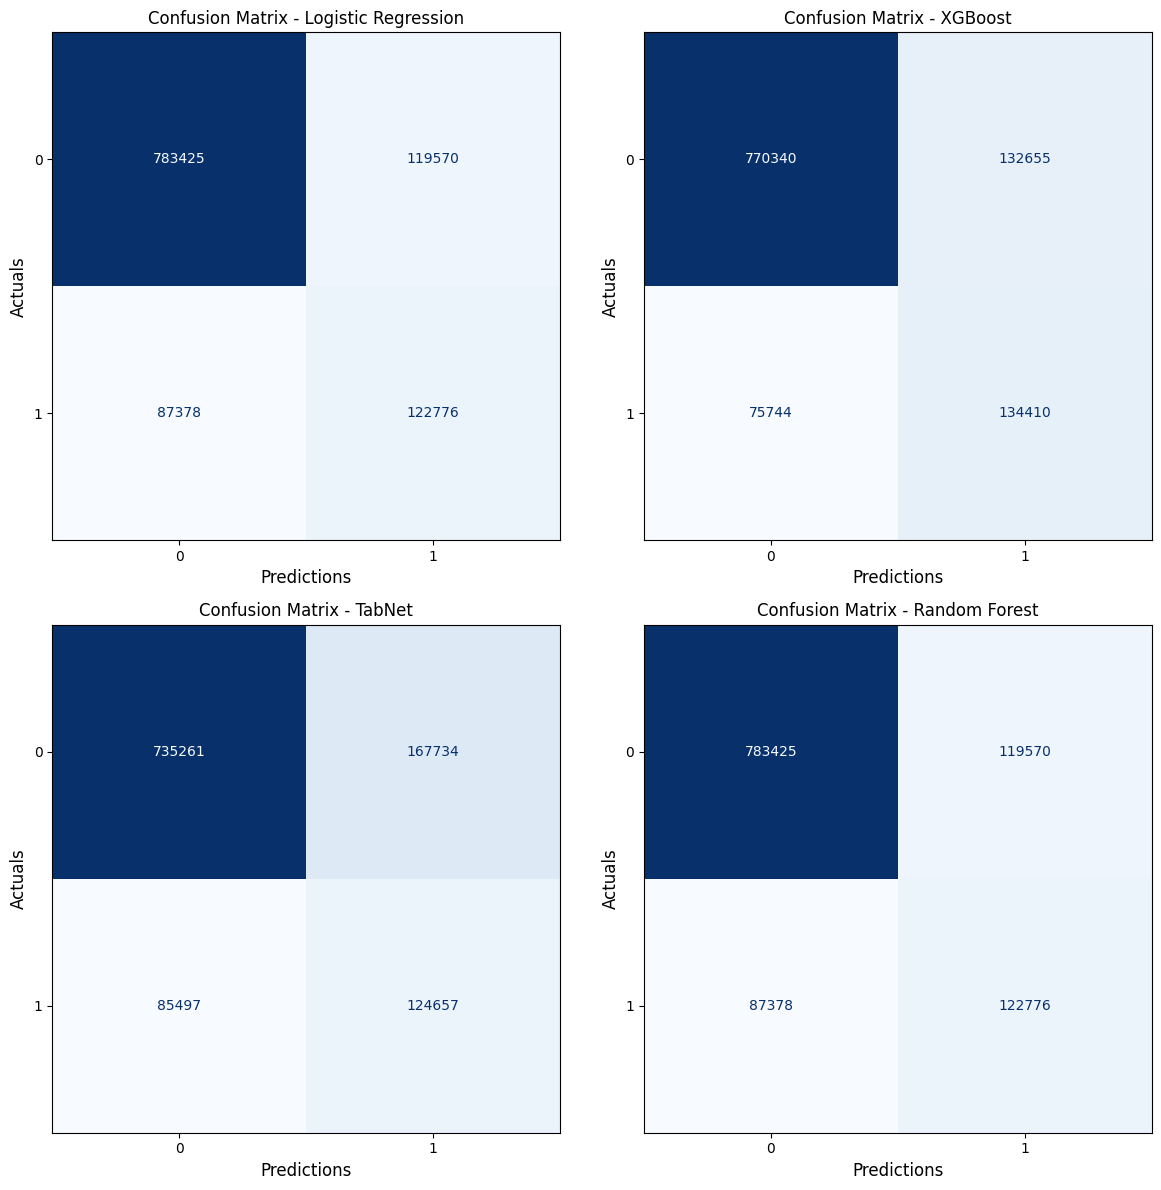

In [19]:
complete_confusion_matrix(y_test, [y_pred_rf_tuned_ros,
                                   y_pred_xgb_tuned_ros,
                                   y_pred_tabnet_tuned_ros,
                                   y_pred_rf_tuned_ros],
                                   ['Logistic Regression',
                                    'XGBoost',
                                    'TabNet',
                                    'Random Forest'])